
<h1 style="font-size:30pt"> Statistical Inference </h1><br/>
<b> Author: </b> Emine Korkut <br/>
<b> Date: </b> 21 January 2024 <br/>


# Table of Contents

+ [1.Introduction to Hypothesis Testing](#intro)
    + [1.1 What is Hypothesis Testing?](#hypothesis-testing)
    + [1.2 Four Steps to Hypothesis Testing](#steps)
      + [1.2.1 Defining Hyptoheses](#step1)
      + [1.2.2 Assumption Check](#step2)
      + [1.2.3 Selecting the Proper Test](#step3)
      + [1.2.4 Decision and Conclusion](#step4)
+ [2.Hypothesis Testing with Python](#code-part)
    + [2.1 Import libraries](#libraries)
    + [2.2 Assumption Check in Python](#assumption-check)
      + [2.2.1 Normality Test](#normality-test)
      + [2.2.2 Equal Variance](#equal-variance)
+ [3.Parametric and Nonparametric Test Examples](#examples)
    + [3.1 Parametric Tests](#parametric)
      + [3.1.1 One-Sample T-Test](#one-sample-t-test)
      + [3.1.2 Two-Sample T-Test](#two-sample-t-test)
      + [3.1.3 Paired T-Test](#paired-t-test)
      + [3.1.4 Anova Test](#anova-test)
    + [3.2 Nonparametric Tests](#non-parametric)
      + [3.2.1 Chi-Squared Test](#chi-squared-test)
      + [3.2.2 Mann-Whitney U Test](#mann-whitney)
      + [3.2.3 Kruskal Wallis H Test](#kruskal)
    + [3.3  Regression](#regression)
      + [3.3.1 Linear Regression](#lr)
      + [3.3.2 Multiple Linear Regression](#mlr)


# 1.Introduction to Hypothesis Testing <a class="anchor" id="intro"></a>



## 1.1 What is Hypothesis Testing? <a class="anchor" id="hypothesis-testing"></a>

Hypothesis Testing is a type of statistical analysis in which you put your assumptions about a population parameter to test.
In any hypothesis-testing problem, there are always two competing hypotheses under consideration:

   1. **The Null Hypothesis** refers to the currently accepted hypothesis. We will test whether the value
      stated in the null hypothesis is likely to be true. It is often denoted by $ H_{0}$

   2. **The Alternate Hypothesis** refers to the new claim that we wish to validate. It is often denoted by $ H_{A}$

## 1.2 Four Steps to Hypothesis Testing <a class="anchor" id="steps"></a>

The method of hypothesis testing can be summarized in four steps:

+ **Step 1** : Defining Hypotheses
+ **Step 2** : Assumption Check
+ **Step 3** : Selecting the Proper Test
+ **Step 4** : Decision and Conclusion

### 1.2.1 Defining Hypotheses <a class="anchor" id="step1"></a>
At the Step 1, we should state our *null hypothesis* and *alternate hypothesis*. 

The alternative to the null hypothesis will look like one of the following three assertions:
+  $ H_{A}$: $θ \neq θ_{0}$ (in which case the null hypothesis is $θ = θ_{0}$)
+  $ H_{A}$: $θ > θ_{0}$ (in which case the null hypothesis is $θ ≤ θ_{0}$)
+  $ H_{A}$: $θ < θ_{0}$ (in which case the null hypothesis is $θ ≥ θ_{0}$)

### 1.2.2 Assumption Check <a class="anchor" id="step2"></a>
At the Step 2, we should decide whether to use the **parametric** or **nonparametric** version of the test. In order to decide, we should check following assumptions:
   + Assumption 1: Normally distributed
   + Assumption 2: Equal Variance.
   + Assumption 3: Independence.
   + Assumption 4: No Outliers
   
If these assumptions are satisfied, we should choose a parametric test. If one of them is not satisfied, then we should choose nonparametric tests.
### 1.2.3 Selecting the Proper Test <a class="anchor" id="step3"></a>
At the Step 3, we should decide appropriate test after we decided that it is parametric or nonparametric. While we are doing this, it is essential to analyze how many groups are being compared and whether the data are paired or not. 
+ **A paired data** is used when we have two measurements or observations for the same subjects or units, and you want to compare their means. For example, comparing the blood pressure of patients before treatment and after the treatment. 
+ **An unpaired data** is used when you have two independent groups or conditions, and you want to compare their means. For example, comparing the heights of men and women.

We can use the chart below for selecting and applying the proper test.

<img src="test table.png">

### 1.2.4 Decision and Conclusion <a class="anchor" id="step4"></a>
At the Step 4, if the probability of obtaining a sample mean is less than the signifigance level, then the decision is to reject the null hypothesis. If the probability of obtaining a sample mean is greater than the signifigance level, then the decision is to fail to reject the null hypothesis. 
To sum up, there are two possible conclusions: 
   1. Reject $ H_{0}$.
   2. Fail to reject $ H_{0}$.








# 2.Hypothesis Testing with Python <a class="anchor" id="code-part"></a>

## 2.1 Import the libraries <a class="anchor" id="libraries"></a>

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scipy




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from sklearn import linear_model #regression
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm


## 2.2 Assumption Check in Python <a class="anchor" id="assumption-check-python"></a>


### 2.2.1 Normality Test <a class="anchor" id="normality-test"></a>

 $ H_{0} = $The data follows a normal distribution.

 $ H_{A} = $The data does not follow a normal distribution.

In [3]:
# Shapiro-Wilk’s W test
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

### 2.2.2 Equal Variance <a class="anchor" id="equal-variance"></a>
 $ H_{0} = $The variance of the samples are equal.

 $ H_{A} = $The variance of the samples are not equal.

In [4]:
# Levene’s test
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

#### Example of Normality Test and Equal Variance Check 

In [5]:

sample1 = np.array([0.911, 0.923, 0.789, 0.771, 0.497, 0.196, 0.101])
sample2 = np.array([0.721, 0.923, 0.769, 0.781, 0.497, 0.196, 0.121])
check_normality(sample1)
check_normality(sample2)
check_variance_homogeneity(sample1,sample2)

p value:0.1542
Fail to reject null hypothesis >> The data is normally distributed
p value:0.2495
Fail to reject null hypothesis >> The data is normally distributed
p value:0.8597
Fail to reject null hypothesis >> The variances of the samples are same.


# 3. Parametric and Nonparametric Test Examples <a class="anchor" id="examples"></a>

+ Parametric tests compare **means** and addition substraction eligible. It should be normal distrubition and continues data. Homogeneous variance.
     + One-Sample T-test
     + Two-Sample T-Test
     + Paired T-Test
     + Anova Test

+ Non-parametric tests compare **medians**, not eligible addition. For example categoric variables. Contradicts with normality discrete data. Non-homogeneous variance.

     + Chi-Square Test
     + Mann-Whitney U Test
     

## 3.1 Parametric Tests <a class="anchor" id="parametric"></a>

### 3.1.1 One-Sample T-Test <a class="anchor" id="one-sample-t-test"></a>
One sample T-test is used to compare the population mean to a sample.

#####  EXAMPLE
We have the potato yield from 12 different farms. We know that the standard potato yield for the given variety is $µ=20$.

    potato_yield = [21.5, 24.5, 18.5, 17.2, 14.5, 23.2, 22.1, 20.5, 19.4, 18.1, 24.1, 18.5]

Test if the potato yield from these farms is significantly better than the standard yield.

###### Step 1 : Defining Hypotheses

 $ H_{0}: μ=20 $ Potato yield from these farms is equal to the standard yield.

 $ H_{A}: μ>20 $ Potato yield from these farms is significantly better than the standard yield.
 
###### Step 2 : Assumption Check



In [6]:
potato_yield = [21.5, 24.5, 18.5, 17.2, 14.5, 23.2, 22.1, 20.5, 19.4, 18.1, 24.1, 18.5]
check_normality(potato_yield)


p value:0.8636
Fail to reject null hypothesis >> The data is normally distributed


###### Step 3 : Selecting Proper Test
Since it is normally distributed, it is parametric. And since we have only one sample, we should apply **One-Sample T-Test**.

In [7]:
#data
potato_yield = [21.5, 24.5, 18.5, 17.2, 14.5, 23.2, 22.1, 20.5, 19.4, 18.1, 24.1, 18.5]
standard_yield = 20

#one-sample t-test
t_statistic, p_value = stats.ttest_1samp(potato_yield, standard_yield)

#results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')
print(f'One-sided p-value: {p_value/2}')
      
#check significance
alpha = 0.05
if p_value/2 < alpha: #since hypothesis testing is one-sided, p-value divided by 2
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

T-statistic: 0.2006562773994862
P-value: 0.8446291893053613
One-sided p-value: 0.4223145946526807
Fail to reject the null hypothesis.


##### Step 4: Decision and Conclusion
Since one-sided p-value is equal to 0.4223145946526807 which is greater than the signifigance level $ \alpha = 0.05 $, we **fail to reject the null hypothesis** and there is enough evidence to say that potato yield from these farms is equal to the standard yield.


### 3.1.2 Two-Sample T-Test <a class="anchor" id="two-sample-t-test"></a>
Two sample T-test is used to compare two samples

##### EXAMPLE
Compare the effectiveness of ammonium chloride and urea, on the grain yield of paddy, an experiment was conducted. 

In [8]:
ammonium_chloride = np.array([13.4,10.9,11.2,11.8,14,15.3,14.2,12.6,17,16.2,16.5,15.7])
urea = np.array([2,11.7,10.7,11.2,14.8,14.4,13.9,13.7,16.9,16,15.6,16])

##### Step 1 : Defining Hypotheses
 $ H_{0}: μ_{1} = μ_{2} $ The effect of ammonium chloride and urea on grain yield of paddy are equal 

 $ H_{A}: μ_{1} \neq μ_{2} $ The effect of ammonium chloride and urea on grain yield of paddy is not equal 

###### Step 2 : Assumption Check


In [9]:
check_normality(ammonium_chloride)
check_normality(urea)

p value:0.5086
Fail to reject null hypothesis >> The data is normally distributed
p value:0.0058
Reject null hypothesis >> The data is not normally distributed


In [10]:
check_variance_homogeneity(ammonium_chloride,urea)


p value:0.4273
Fail to reject null hypothesis >> The variances of the samples are same.


Since it satisfies the normality and homogenity of variance, it is a parametric test.


###### Step 3 : Selecting Proper Test
Since it is parametric and there are two sample, we need to choose **Two-sample T-test**.

In [11]:
#two-sample t-test
scipy.stats.ttest_ind(ammonium_chloride, urea)

TtestResult(statistic=0.756390039020164, pvalue=0.4574393176187519, df=22.0)

##### Step 4: Decision and Conclusion
Since p-value is 0.4574393176187519 which is greater than $ \alpha = 0.05 $ we **fail to reject the null hypthesis** and there is enough evidence to say that the effect of ammonium chloride and urea on grain yield of paddy are equal

### 3.1.3 Paired T-Test <a class="anchor" id="paired-t-test"></a>
W are interested in comparing the mean measurement between two groups in which each observation in one sample can be paired with an observation in the other sample.

##### EXAMPLE
Suppose we want to know whether or not a certain training program is able to increase the max vertical jump (in inches) of college basketball players.

To test this, we may recruit a simple random sample of 20 college basketball players and measure each of their max vertical jumps. Then, we may have each player use the training program for one month and then measure their max vertical jump again at the end of the month.

<img src="paired-t-test.png" width="300">

##### Step 1 : Defining Hypotheses
 $ H_{0}: μ_{1} = μ_{2} $ Training program is able to increase the max vertical jump.

 $ H_{A}: μ_{1} \neq μ_{2} $ Training program is not able to increase the max vertical jump. 

###### Step 2 : Assumption Check


In [12]:
before_training = [22, 20, 19, 24, 25, 25,28, 22, 30, 27, 24, 18, 16, 19, 19, 28, 24, 25, 25, 23]
after_training = [24, 22, 19, 22, 28, 26, 28, 24, 30, 29, 25, 20, 17, 18, 18, 28, 26, 27, 27, 24]

check_normality(before_training)
check_normality(after_training)
check_variance_homogeneity(before_training,after_training)

p value:0.6845
Fail to reject null hypothesis >> The data is normally distributed
p value:0.1753
Fail to reject null hypothesis >> The data is normally distributed
p value:0.6307
Fail to reject null hypothesis >> The variances of the samples are same.


Since they are normally distributed and their variance are equal, it is a parametric test.

###### Step 3 : Selecting Proper Test
Since it is a parametric test and we are checking the same player's before and after treatment, it is a paired data. So, we need to use **Paired T-test**


In [13]:
#paired t-test
t_statistic, p_value = stats.ttest_rel(before_training,after_training)

#results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

#check significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

T-statistic: -3.22617331116718
P-value: 0.004445370704412229
Reject the null hypothesis.


##### Step 4: Decision and Conclusion
Since the p-value is equal to 0.004445370704412229 which is less than our significance level $\alpha = 0.05$, we **reject the null hypothesis**. We have sufficient evidence to say that the mean max vertical jump of players is different before and after participating in the training program.

### 3.1.4 Anova Test <a class="anchor" id="anova-test"></a>
The analysis of variance or ANOVA is a statistical inference test that lets you compare multiple groups at the same time.

##### EXAMPLE 
40 randomly chosen students from 3 different countries which are USA, UK, and Germany have participated in a 500m running competition and got their results with the means of $\approx 74s,\approx 88s,\approx84s$, respectively. We want to determine if there is an actual difference between these different students groups regarding their middle-distance running performance or by pure chance if we happened to select better or worse performing students from other countries.

######  Data Preparation

In [14]:
np.random.seed(42)

# create Artificial randomly distributed data representing students' running competition records
# np.random.normal: for generating random numbers from a normal distribution.
# loc: sets the mean (average) of the distribution.
# scale:sets the standard deviation of the distribution.
# size: number of random numbers to generate

USA = np.random.normal(loc=74,scale=4,size=40)
UK = np.random.normal(loc=88,scale=4,size=40)
Germany = np.random.normal(loc=84,scale=4,size=40)

# print mean results for each country
for i in range(3):
    print(['USA: ','UK: ','Germany: '][i],[USA,UK,Germany][i].mean().round(1))
    
# c reate Dataframes representing each student groups
list_USA = []
for i in range(40): list_USA.append('USA')
df_USA = pd.DataFrame(data={'Country':list_USA,'Results':list(map(lambda x: x.round(1), USA))})

list_UK = []
for i in range(40): list_UK.append('UK')
df_UK = pd.DataFrame(data={'Country':list_UK,'Results':list(map(lambda x: x.round(1), UK))})

list_Germany = []
for i in range(40): list_Germany.append('Germany')
df_Germany = pd.DataFrame(data={'Country':list_Germany,'Results':list(map(lambda x: x.round(1), Germany))})

#Concatenate the dataframes into one
df_students = pd.concat([df_USA,df_UK,df_Germany],ignore_index=True)
df_students

USA:  73.1
UK:  87.9
Germany:  84.0


,Country,Results
0,USA,76.0
1,USA,73.4
2,USA,76.6
3,USA,80.1
4,USA,73.1
...,...,...
115,Germany,85.2
116,Germany,83.9
117,Germany,79.3
118,Germany,88.6


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


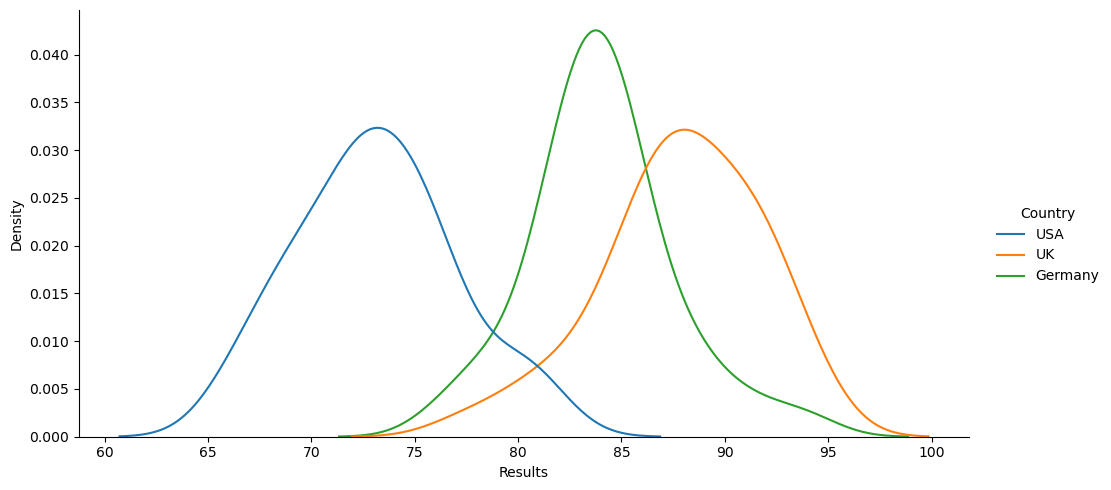

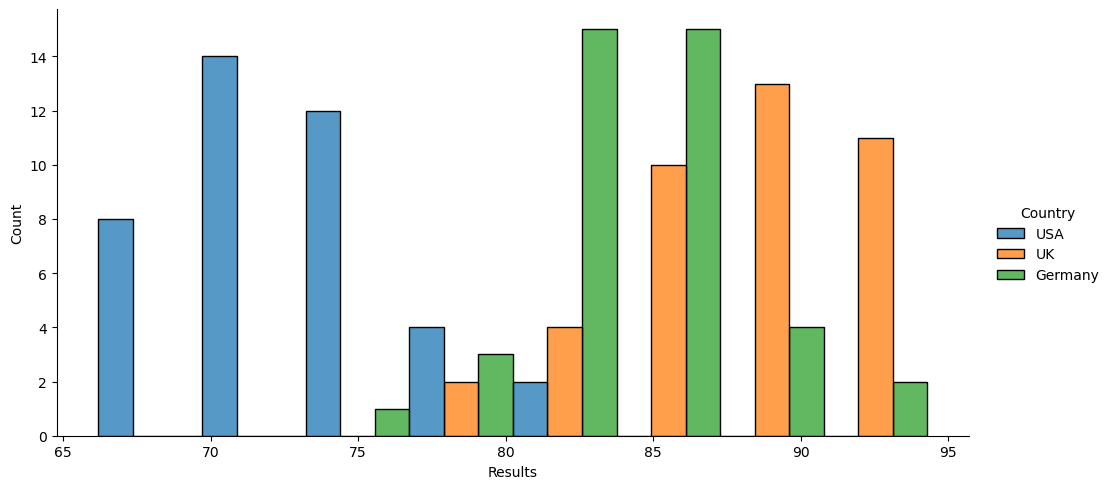

In [15]:
%matplotlib inline
sns.displot(df_students,x='Results',hue='Country',kind='kde',height=5,aspect=2)
sns.displot(df_students,x='Results',hue='Country',multiple='dodge',height=5,aspect=2)

##### Step 1 : Defining Hypotheses
$ H_{0}: μ_{1} = μ_{2} = μ_{3} $ There is no difference in the mean running performance between the USA, UK, and Germany.

$ H_{A}: μ_{1} \neq μ_{2} \neq μ_{3}  $ There is a difference in the mean running performance between at least two countries.


###### Step 2 : Assumption Check


In [16]:
check_normality(USA)
check_normality(UK)
check_normality(Germany)

# Levene’s test for 3 groups
def check_variance_homogeneity_for_3groups(group1, group2, group3):
    test_stat_var, p_value_var= stats.levene(group1, group2, group3)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")
check_variance_homogeneity_for_3groups(USA,UK,Germany)

p value:0.6604
Fail to reject null hypothesis >> The data is normally distributed
p value:0.3709
Fail to reject null hypothesis >> The data is normally distributed
p value:0.3269
Fail to reject null hypothesis >> The data is normally distributed
p value:0.5200
Fail to reject null hypothesis >> The variances of the samples are same.


###### Step 3 : Selecting Proper Test
Since it is satisfied the assumptions, it is parametric test and since there is more than two group, we should use **ANOVA** test. 


In [17]:
stats.f_oneway(df_students['Results'][df_students['Country']=="UK"],
              df_students['Results'][df_students['Country']=="Germany"],
              df_students['Results'][df_students['Country']=="USA"])


F_onewayResult(statistic=169.69016461545252, pvalue=2.619680027521838e-35)

In [18]:
anova_students = ols('Results~Country',data=df_students).fit()
# examine the anova table 
anova_table = sm.stats.anova_lm(anova_students, type=2)
print(anova_table)

             df      sum_sq      mean_sq           F        PR(>F)
Country     2.0  4686.96200  2343.481000  169.690165  2.619680e-35
Residual  117.0  1615.81125    13.810353         NaN           NaN


##### Step 4: Decision and Conclusion
We reject $ H_{0}$ because p-value $ 2.6196800275221696e-35 < 0.05 $. We have significant evidence at 0.05 level the running race results of the students from three countries belong to different populations.

## 3.2 Nonparametric Tests <a class="anchor" id="non-parametric"></a>

 ### 3.2.1 Chi-Squared Test <a class="anchor" id="chi-squared-test"></a>

A Chi-square test is a hypothesis testing method. Two common Chi-square tests involve checking if observed frequencies in one or more categories match expected frequencies. If you have a single measurement variable, you use a Chi-square goodness of fit test. If you have two measurement variables, you use a Chi-square test of independence. 

##### Example
The students data set consists of 8239 rows, each representing a particular student, and 16 columns corresponding to a variable/feature related to that particular student. Test iff there is an association between the variables gender and major, or in other words, we want to know if male students favour different study subjects compared to female students.
######  Data Preparation

In [19]:
students = pd.read_csv("students.csv")
students

,stud.id,name,gender,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary
1,833917,"Gonzales, Christina",Female,19,160,64.8,Muslim,1.91,1st,Political Science,Social Sciences,NaN,NaN,0,0,NaN
2,898539,"Lozano, T'Hani",Female,19,172,73.0,Other,1.56,2nd,Social Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
3,379678,"Williams, Hanh",Female,22,168,70.6,Protestant,1.24,3rd,Social Sciences,Mathematics and Statistics,45.0,46.0,0,0,NaN
4,807564,"Nem, Denzel",Male,19,183,79.7,Other,1.37,2nd,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
5,383291,"Powell, Heather",Female,21,175,71.4,Catholic,1.46,1st,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8235,818044,"Her, Joshua",Male,22,181,79.1,Protestant,2.91,6th,Environmental Sciences,Social Sciences,73.0,71.0,0,1,36750.087135
8236,560166,"Reid, Jose",Male,23,178,72.6,Catholic,2.03,2nd,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
8237,380174,"Villa, Raechelle",Female,20,169,67.7,Other,3.72,3rd,Environmental Sciences,Economics and Finance,77.0,75.0,1,0,NaN
8238,540967,"Ngo, Preston",Male,23,195,98.6,Other,2.74,4th,Social Sciences,Political Science,50.0,46.0,1,1,40112.041834


In [20]:
n = 865 
sample = students.sample(n, random_state = 8) #randomly select 865 students from the data set.

observed_frequencies_table = pd.crosstab(sample.major, sample.gender, margins=False)
observed_frequencies_table

gender,Female,Male
major,,
Biology,102,66
Economics and Finance,53,82
Environmental Sciences,63,88
Mathematics and Statistics,33,93
Political Science,111,61
Social Sciences,78,35


In [21]:
n = 865

observed = pd.crosstab(sample.major, sample.gender, margins=False)
expected_frequencies_table = pd.crosstab(sample.major, sample.gender, margins=False)

for row in range(0, expected_frequencies_table.shape[0]):
    for column in range(0, expected_frequencies_table.shape[1]):
        exp = (np.sum(observed_frequencies_table.iloc[row, :]) * np.sum(observed_frequencies_table.iloc[:, column])) / n
        expected_frequencies_table.iloc[row, column] = exp
        
expected_frequencies_table

gender,Female,Male
major,,
Biology,85.456647,82.543353
Economics and Finance,68.670520,66.329480
Environmental Sciences,76.809249,74.190751
Mathematics and Statistics,64.092486,61.907514
Political Science,87.491329,84.508671
Social Sciences,57.479769,55.520231


##### Step 1 : Defining Hypotheses
$ H_{0}: μ_{1} = μ_{2} = μ_{3} $ No association between gender and major study subject

$ H_{A}: μ_{1} \neq μ_{2} \neq μ_{3}  $ There is an association between gender and major study subject

##### Step 2 : Assumption Check
Since we have not numerical variables, we cannot compare the means of dataset. So, we need to use nonparametric test.

##### Step 3 : Selecting Proper Test
We have two categorical variable, so we need to apply Chi-square test of independence.

In [22]:
test_result = chi2_contingency(observed_frequencies_table)

test_result

Chi2ContingencyResult(statistic=77.31526633939146, pvalue=3.056046255717623e-15, dof=5, expected_freq=array([[85.4566474 , 82.5433526 ],
       [68.67052023, 66.32947977],
       [76.80924855, 74.19075145],
       [64.09248555, 61.90751445],
       [87.49132948, 84.50867052],
       [57.47976879, 55.52023121]]))

In [23]:

print("Teststatistic = {}".format(round(test_result.statistic, 5)))
print("p-value = {}".format(round(test_result.pvalue, 15)))

Teststatistic = 77.31527
p-value = 3e-15


##### Step 4: Decision and Conclusion
The p-value is smaller than the significance level of 0.05, so we reject $ H_{0} $. The test results are statistically significant at the 5 % level and provide very strong evidence against the null hypothesis. Therefore, at the 5 % significance level, the data provide very strong evidence to conclude that there is an association between gender and the major study subject

### 3.2.2 Mann-Whitney U Test <a class="anchor" id="mann-whitney"></a>
Wilcoxon test, also known as the Wilcoxon rank-sum test or the Mann-Whitney test, is a non-parametric statistical test used to compare the medians of two groups. It is often used as an alternative to the t-test when the assumptions of normality or equal variances are not met.

##### Example

Researchers want to know if a fuel treatment leads to a change in the average mpg of a car. To test this, they measure the mpg of 5 cars with the fuel treatment and 5 cars without it.


######  Data Preparation 


In [24]:
group_a = [1, 40, 10, 7, 9]
group_b = [25, 4, 6, 15, 10]

##### Step 1 : Defining Hypotheses
$ H_{0}: μ_{1} = μ_{2} $ The mpg is equal between the two groups

$ H_{A}: μ_{1} \neq μ_{2}  $ The mpg is not equal between the two groups

##### Step 2 : Assumption Check


In [25]:
check_normality(group_a)
check_normality(group_b)
check_variance_homogeneity(group_a, group_b)

p value:0.0373
Reject null hypothesis >> The data is not normally distributed
p value:0.5467
Fail to reject null hypothesis >> The data is normally distributed
p value:0.7141
Fail to reject null hypothesis >> The variances of the samples are same.


##### Step 3 : Selecting Proper Test
Since the sample sizes are small and the researchers suspect that the sample distributions are not normally distributed, we need perform a **Mann-Whitney U Test** to determine if there is a statistically significant difference in mpg between the two groups.

In [26]:
statistic, p_value = mannwhitneyu(group_a, group_b)
print("Statistic:", statistic)
print("p-value:", p_value)

Statistic: 11.5
p-value: 0.9165626446795413


##### Step 4: Decision and Conclusion
Since the p-value which is 0.9165626446795413 is greater than the signifigance level which is 0.05, we **fail to reject** the null hypothesis. So, the is no significant evidence to say that the mpg is not equal between the two groups.

 ### 3.2.3 Kruskal Wallis H Test <a class="anchor" id="kruskal"></a>


Kruskal-Wallis test is a non-parametric test and an alternative to the parametric One-Way Anova Test. The main objective of this test is used to determine whether there is a statistical difference between the medians of at least three independent groups. 
We can use the below code in order to apply it in Python. 
"result = stats.kruskal(data_group1, data_group2, data_group3)"


## 3.3 Regression <a class="anchor" id="regression"></a>

 ### 3.3.1 Linear Regression <a class="anchor" id="lr"></a>

Simple linear regression is a technique that we can use to understand the relationship between a single explanatory variable and a single response variable.

This technique finds a line that best “fits” the data and takes on the following form:

$ ŷ = b_{0} + b_{1}x $

where

+ ŷ: The estimated response value
+ $b_{0}$: The intercept of the regression line
+ $b_{1}$: The slope of the regression line

In [27]:
##### Dataset Preparation

In [28]:
#create dataset
df = pd.DataFrame({'hours': [1, 2, 4, 5, 5, 6, 6, 7, 8, 10, 11, 11, 12, 12, 14],
                   'score': [64, 66, 76, 73, 74, 81, 83, 82, 80, 88, 84, 82, 91, 93, 89]})
df

,hours,score
0,1,64
1,2,66
2,4,76
3,5,73
4,5,74
5,6,81
6,6,83
7,7,82
8,8,80
9,10,88


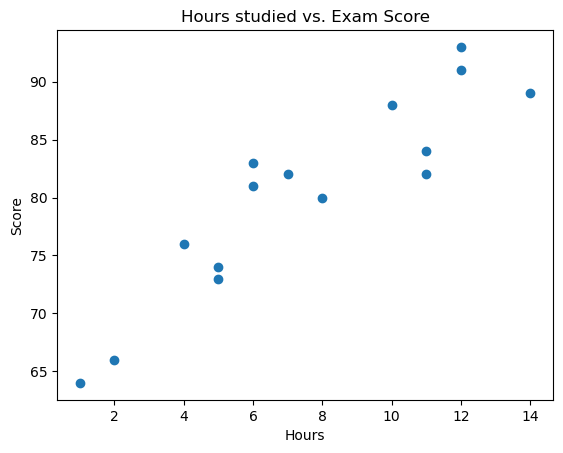

In [29]:
plt.scatter(df.hours, df.score)
plt.title('Hours studied vs. Exam Score')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

<Axes: >

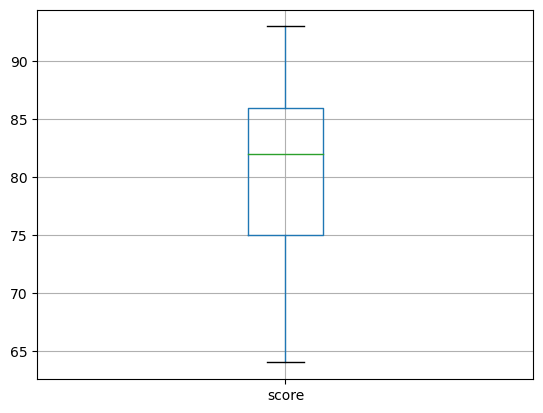

In [30]:
df.boxplot(column=['score'])


In [31]:
#define response variable
y = df['score']

#define explanatory variable
x = df[['hours']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     63.91
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           2.25e-06
Time:                        15:05:42   Log-Likelihood:                -39.594
No. Observations:                  15   AIC:                             83.19
Df Residuals:                      13   BIC:                             84.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.3340      2.106     31.023      0.0

C:\Users\Lenovo\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


From the model summary we can see that the fitted regression equation is:

**$Score = 65.334 + 1.9824*(hours)$**

+ **P>|t|:** This is the p-value associated with the model coefficients. Since the p-value for hours (0.000) is significantly less than .05, we can say that there is a statistically significant association between hours and score.
+ **R-squared:** This number tells us the percentage of the variation in the exam scores can be explained by the number of hours studied. In general, the larger the R-squared value of a regression model the better the explanatory variables are able to predict the value of the response variable. In this case, 83.1% of the variation in scores can be explained by hours studied.
+ **F-statistic & p-value:** The F-statistic (63.91) and the corresponding p-value (2.25e-06) tell us the overall significance of the regression model, i.e. whether explanatory variables in the model are useful for explaining the variation in the response variable. Since the p-value in this example is less than .05, our model is statistically significant and hours is deemed to be useful for explaining the variation in score.

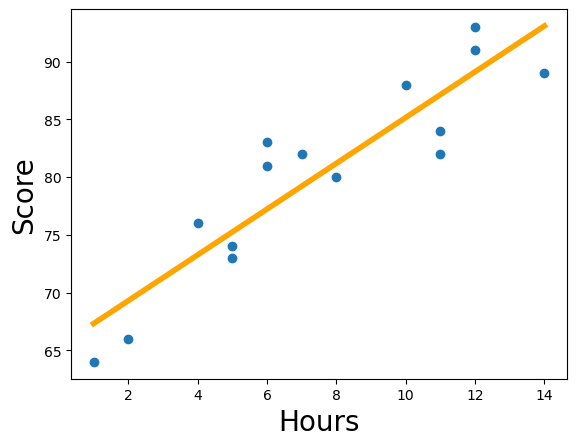

In [32]:
plt.scatter(df.hours, df.score)
yhat =1.9824*x + 65.3340 
fig = plt.plot(x,yhat, lw=4, c='orange', label = 'regression line')
plt.xlabel('Hours', fontsize =20)
plt.ylabel('Score', fontsize =20)
plt.show()

 ### 3.3.2 Multiple Linear Regression <a class="anchor" id="mlr"></a>

Multiple linear regression is a regression model that estimates the relationship between a quantitative dependent variable and two or more independent variables using a straight line.

We will perform multiple linear regression for a fictitious economy, where the index_price is the dependent variable, and the 2 independent/input variables are:

+ interest_rate
+ unemployment_rate

In [33]:

data = {'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
        'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
        'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
        'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
        'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
        }

df = pd.DataFrame(data) 

print(df)

    year  month  interest_rate  unemployment_rate  index_price
0   2017     12           2.75                5.3         1464
1   2017     11           2.50                5.3         1394
2   2017     10           2.50                5.3         1357
3   2017      9           2.50                5.3         1293
4   2017      8           2.50                5.4         1256
5   2017      7           2.50                5.6         1254
6   2017      6           2.50                5.5         1234
7   2017      5           2.25                5.5         1195
8   2017      4           2.25                5.5         1159
9   2017      3           2.25                5.6         1167
10  2017      2           2.00                5.7         1130
11  2017      1           2.00                5.9         1075
12  2016     12           2.00                6.0         1047
13  2016     11           1.75                5.9          965
14  2016     10           1.75                5.8      

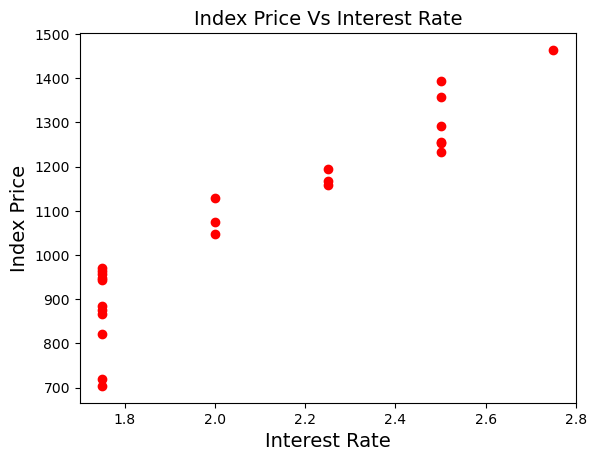

In [34]:

plt.scatter(df['interest_rate'], df['index_price'], color='red')
plt.title('Index Price Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Index Price', fontsize=14)
plt.show()

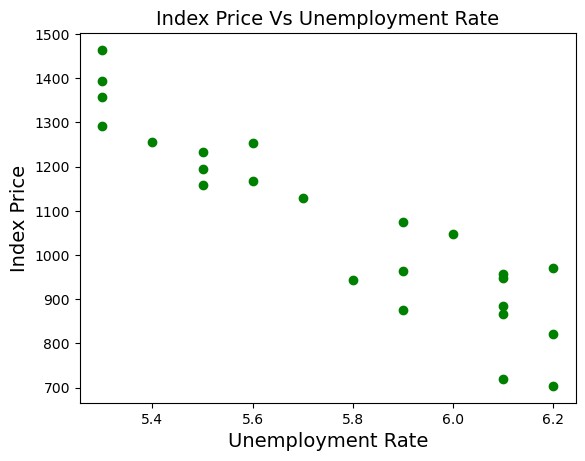

In [35]:

plt.scatter(df['unemployment_rate'], df['index_price'], color='green')
plt.title('Index Price Vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=14)
plt.ylabel('Index Price', fontsize=14)
plt.show()

In [36]:

x = df[['interest_rate','unemployment_rate']]
y = df['index_price']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 1798.403977625855
Coefficients: 
 [ 345.54008701 -250.14657137]
                            OLS Regression Results                            
Dep. Variable:            index_price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           4.04e-11
Time:                        15:05:45   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

This output is from a multiple linear regression model that predicts the dependent variable "index_price" based on two independent variables: "interest_rate" and "unemployment_rate." 

Intercept (const):

The intercept is the value of the dependent variable when all independent variables are set to zero.
In this case, when both interest_rate and unemployment_rate are zero, the predicted value of "index_price" is 1798.4040.
Coefficients:

"interest_rate" coefficient is 345.5401, meaning that for a one-unit increase in the "interest_rate," the predicted "index_price" increases by 345.5401 units, assuming other variables are held constant.
"unemployment_rate" coefficient is -250.1466, indicating that for a one-unit increase in the "unemployment_rate," the predicted "index_price" decreases by 250.1466 units, assuming other variables are held constant.

R-squared:
R-squared is a measure of how well the independent variables explain the variability in the dependent variable.
In this case, R-squared is 0.898, suggesting that approximately 89.8% of the variability in "index_price" is explained by the independent variables.

F-statistic:
The F-statistic tests the overall significance of the regression model.
A higher F-statistic (92.07 in this case) with a low probability (Prob (F-statistic)) suggests that the model is statistically significant.

P-values (P>|t|) for Coefficients:
These p-values test the null hypothesis that each coefficient is equal to zero (i.e., the corresponding variable has no effect on the dependent variable).
In this case, both "interest_rate" and "unemployment_rate" have p-values less than 0.05, indicating that they are statistically significant in predicting "index_price."
Other Information:

In summary, the model suggests that both interest_rate and unemployment_rate are statistically significant predictors of "index_price," and the model as a whole is significant in explaining the variability in the dependent variable.

# References
+ https://www.geo.fu-berlin.de/en/v/soga-py/Basics-of-statistics/Hypothesis-Tests/Chi-Square-Tests/Chi-Square-Independence-Test/index.html
+ https://datatofish.com/multiple-linear-regression-python/
+ https://medium.com/@isguzarsezgin/anova-analysis-of-variance-test-explanation-and-an-example-python-af801c64d414
+ https://www.kaggle.com/code/hamelg/python-for-data-25-chi-squared-tests#Next-Lesson:-Python-for-Data-26:-ANOVA
+ https://www.colorado.edu/amath/sites/default/files/attached-files/lesson9_hyptests.pdf
+ https://www.sagepub.com/sites/default/files/upm-binaries/40007_Chapter8.pdf
+ https://plainenglish.io/blog/statistical-tests-with-python-880251e9b572
+ https://www.analyticsvidhya.com/blog/2021/07/t-test-performing-hypothesis-testing-with-python/